In [19]:
from lcs import *
import xgi
import numpy as np
import matplotlib.pyplot as plt
import fig_settings as fs
import matplotlib.cm as cm
import seaborn as sns

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lcs import *
import arviz as az

import cmasher as cmr

In [20]:
fs.set_fonts()

/Users/nicholaslandry/Documents/GitHub/xgi/xgi/drawing/draw.py:472: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


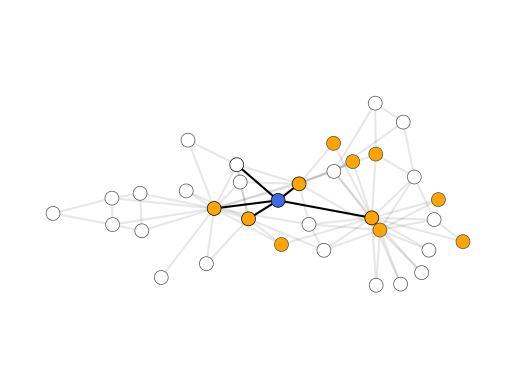

In [30]:
el = zkc(format="edgelist")
H = xgi.Hypergraph(el)
A = zkc()
n = A.shape[0]

i = 13
t = 56

gamma = 0.2
b = 0.07
contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c = contagion_function(np.arange(n), b)
x0 = np.zeros(n)
x0[0] = 1

x = contagion_process(A, gamma, c, x0, tmin=0, tmax=100, random_seed=2)

infected_color = "orange"
susceptible_color = "white"
subgraph_color = "black"
graph_color = (0.1, 0.1, 0.1, 0.1)
subgraph_node_lc = "black"
graph_node_lc = (0.3, 0.3, 0.3)

sg = H.nodes.memberships(i)
nbrs = H.nodes.neighbors(i)
nbrs.add(i)

pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=5, k=0.3))
node_fc = [infected_color if x[t, i] else susceptible_color for i in H.nodes]
node_ec = [subgraph_node_lc if n in nbrs else graph_node_lc for n in H.nodes]
node_fc[12] = "royalblue"

dyad_color = [subgraph_color if e in sg else graph_color for e in H.edges]


xgi.draw(
    H,
    pos=pos,
    node_size=10,
    node_fc=node_fc,
    dyad_color=dyad_color,
    node_ec=node_ec,
    node_lw=0.5,
)
plt.savefig("Figures/Fig1/zkc_network.svg", dpi=1000)
plt.show()

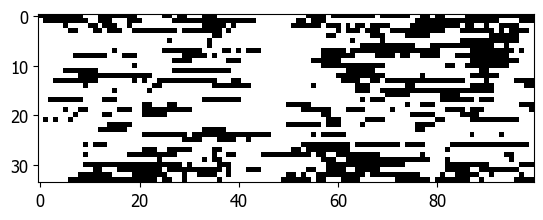

In [31]:
plt.imshow(x.T, cmap=cm.Greys, vmin=0, vmax=1, interpolation="none")
plt.yticks([0, 10, 20, 30])
plt.savefig("Figures/Fig1/x.svg", dpi=1000)
plt.show()

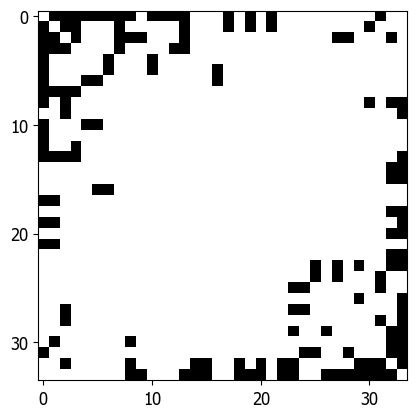

In [32]:
plt.imshow(A, vmin=0, vmax=1, cmap=cm.Greys, interpolation="none")
plt.xticks([0, 10, 20, 30])
plt.yticks([0, 10, 20, 30])
plt.savefig("Figures/Fig1/a.svg", dpi=1000)
plt.show()

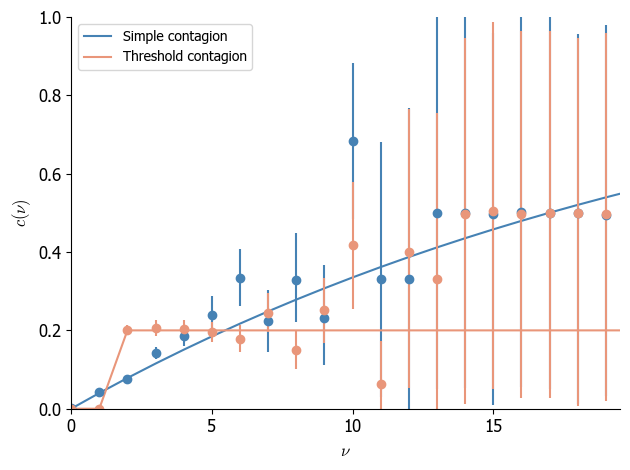

In [33]:
with open("Data/zkc_infer_contagion_functions.json") as file:
    data = json.load(file)

A = np.array(data["A"], dtype=float)
c1 = np.array(data["c1"], dtype=float)
c2 = np.array(data["c2"], dtype=float)
x1 = np.array(data["x1"], dtype=int)
x2 = np.array(data["x2"], dtype=int)
A1_samples = np.array(data["A1-samples"], dtype=int)
A2_samples = np.array(data["A2-samples"], dtype=int)
gamma1_samples = np.array(data["gamma1-samples"], dtype=float)
gamma2_samples = np.array(data["gamma2-samples"], dtype=float)
c1_samples = np.array(data["c1-samples"], dtype=float)
c2_samples = np.array(data["c2-samples"], dtype=float)
l1 = np.array(data["l1"], dtype=float)
l2 = np.array(data["l2"], dtype=float)

# import cmasher as cmr
# cmap = cmr.ember
colors = ["steelblue", "darksalmon", "mediumseagreen"]

kmax = np.max(degrees(A))
n = A.shape[0]

nus = np.arange(0, n, 1)

plt.figure()

# simple contagion
c1_mean = c1_samples.mean(axis=0)
plt.plot(nus, c1, "-", color=colors[0], label="Simple contagion")
# plt.scatter(nus, c1_mean, linewidth=0.5, color=colors[0])

err_c1 = np.zeros((2, n))
c1_mode = np.zeros(n)
for i in range(n):
    interval = az.hdi(c1_samples[:, i], hdi_prob=0.95)
    x, y = interval
    err_c1[0, i] = max(c1_mean[i] - x, 0)
    err_c1[1, i] = max(y - c1_mean[i], 0)
plt.errorbar(nus, c1_mean, err_c1, color=colors[0], fmt="o")

# threshold contagion, tau=2
c2_mean = c2_samples.mean(axis=0)
plt.plot(nus, c2, "-", color=colors[1], label="Threshold contagion")
# plt.scatter(nus, c2_mean, linewidth=0.5, color=colors[1])

err_c2 = np.zeros((2, n))
c2_mode = np.zeros(n)
for i in range(n):
    interval = az.hdi(c2_samples[:, i], alpha=0.05, roundto=4)
    x, y = interval
    err_c2[0, i] = max(c2_mean[i] - x, 0)
    err_c2[1, i] = max(y - c2_mean[i], 0)
plt.errorbar(nus, c2_mean, err_c2, color=colors[1], fmt="o")

plt.xticks(np.arange(0, n, 5))
plt.xlabel(r"$\nu$")
plt.ylabel(r"$c(\nu)$")


plt.xlim([0, kmax + 2.5])
plt.ylim([0, 1])

plt.legend(loc="upper left")

sns.despine()
plt.tight_layout()


plt.savefig("Figures/Fig1/zkc_infer_contagion_function.svg", dpi=1000)
plt.savefig("Figures/Fig1/zkc_infer_contagion_function.png", dpi=1000)
plt.savefig("Figures/Fig1/zkc_infer_contagion_function.pdf", dpi=1000)
plt.show()

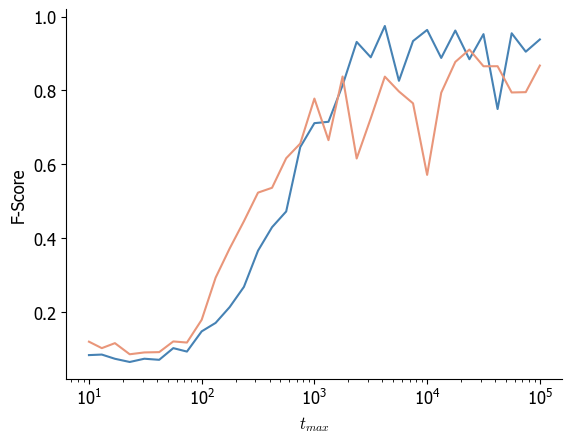

In [34]:
with open("Data/zkc_infer_vs_tmax.json") as file:
    data = json.load(file)

colors = ["steelblue", "darksalmon", "mediumseagreen"]

tmax = data["tmax"]
sps = np.array(data["sps"], dtype=float)
ps = np.array(data["ps"], dtype=float)
fce = np.array(data["fce"], dtype=float)

plt.semilogx(tmax, sps[0].mean(axis=1), color=colors[0])
plt.semilogx(tmax, sps[1].mean(axis=1), color=colors[1])
plt.ylabel("F-Score")
plt.xlabel(r"$t_{max}$")
sns.despine()

plt.savefig("Figures/Fig1/zkc_infer_vs_tmax.svg", dpi=1000)
plt.savefig("Figures/Fig1/zkc_infer_vs_tmax.png", dpi=1000)
plt.savefig("Figures/Fig1/zkc_infer_vs_tmax.pdf", dpi=1000)
plt.show()

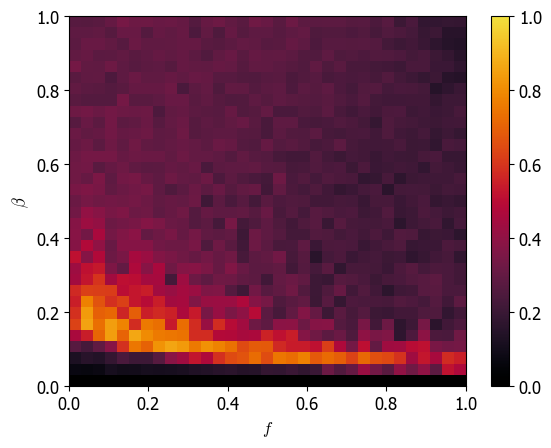

In [36]:
with open("Data/zkc_frac_vs_beta.json") as file:
    data = json.load(file)
beta = np.array(data["beta"], dtype=float)
frac = np.array(data["fraction"], dtype=float)
ps = np.array(data["ps"], dtype=float)
sps = np.array(data["sps"], dtype=float)
fce = np.array(data["fce"], dtype=float)

cmap = cmr.sunburst
cmap = cmr.ember

sps_summary = sps.mean(axis=2).T

c = plt.imshow(
    to_imshow_orientation(sps_summary),
    extent=(min(frac), max(frac), min(beta), max(beta)),
    aspect="auto",
    cmap=cmap,
    vmin=0,
    vmax=1,
)
plt.xlabel(r"$f$")
plt.ylabel(r"$\beta$")
plt.colorbar(c)

plt.savefig("Figures/Fig1/zkc_frac_vs_beta.svg", dpi=1000)
plt.savefig("Figures/Fig1/zkc_frac_vs_beta.png", dpi=1000)
plt.savefig("Figures/Fig1/zkc_frac_vs_beta.pdf", dpi=1000)
plt.show()